# Financial Data - Advanced Analysis Techniques

## Importing Financial Data from Excel

Before you can move on with the next Lectures on Importing Data from Excel with pd.read_excel() you may need to import xlrd with the following command (to be entered into __Anaconda Prompt__ / __Terminal Window__):

conda install xlrd

In [1]:
import pandas as pd

In [4]:
pd.read_excel("data/SP500.xls").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [5]:
pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296


In [6]:
pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols = "A, C:E")

,High,Low,Close
Date,,,
1970-12-31,92.790001,91.360001,92.150002
1971-01-04,92.190002,90.639999,91.150002
1971-01-05,92.279999,90.690002,91.800003
1971-01-06,93.000000,91.500000,92.349998
1971-01-07,93.260002,91.750000,92.379997
...,...,...,...
2018-12-21,2504.409912,2408.550049,2416.620117
2018-12-24,2410.340088,2351.100098,2351.100098
2018-12-26,2467.760010,2346.580078,2467.699951


In [7]:
pd.read_excel("data/SP500.xls", sheet_name= "Sales")

,Unnamed: 0,City,Sales
0,Mike,New York,25
1,Jim,Boston,43
2,Steven,London,76
3,Joe,Madrid,12
4,Tom,Paris,89


In [8]:
SP500 = pd.read_excel("data/SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols= "A:E")

In [9]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [10]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [11]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [12]:
SP500.to_csv("data/SP500.csv")

In [ ]:
#SP500.to_excel("SP500_red.xls") #old

In [16]:
SP500.to_excel("data/SP500_red.xlsx") #new

## Simple Moving Averages (SMA) with rolling()

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [18]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates = ["Date"], index_col = "Date")

In [19]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [20]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [21]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [22]:
SP500 = SP500.Close.to_frame()

In [23]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


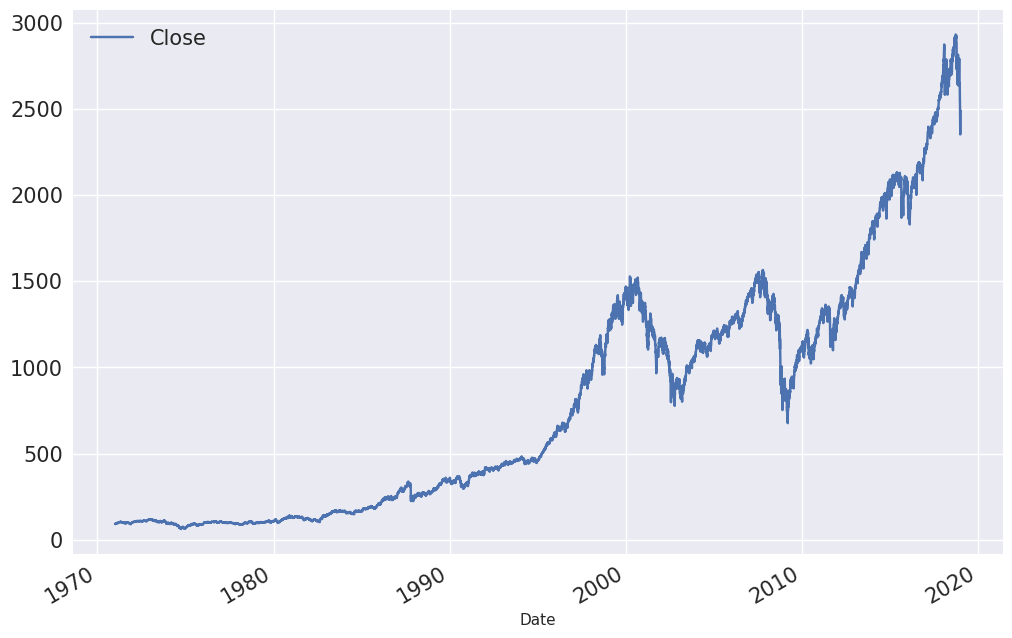

In [24]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [25]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [26]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0,method=single]

In [27]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [28]:
SP500.head(15)

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
2009-01-09,890.349976
2009-01-12,870.260010
2009-01-13,871.789978


In [29]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [30]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [31]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,920.770007
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [32]:
SP500.tail(10)

,Close
Date,
2018-12-14,2599.949951
2018-12-17,2545.939941
2018-12-18,2546.159912
2018-12-19,2506.959961
2018-12-20,2467.419922
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078


## Momentum Trading Strategies with SMAs

In [33]:
SP500.head()

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024


In [34]:
SP500.tail()

,Close
Date,
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078
2018-12-28,2485.739990


In [35]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

In [36]:
SP500

,Close,SMA50
Date,,
2008-12-31,903.250000,NaN
2009-01-02,931.799988,NaN
2009-01-05,927.450012,NaN
2009-01-06,934.700012,NaN
2009-01-07,906.650024,NaN
...,...,...
2018-12-21,2416.620117,2692.420195
2018-12-24,2351.100098,2684.874795
2018-12-26,2467.699951,2678.886196


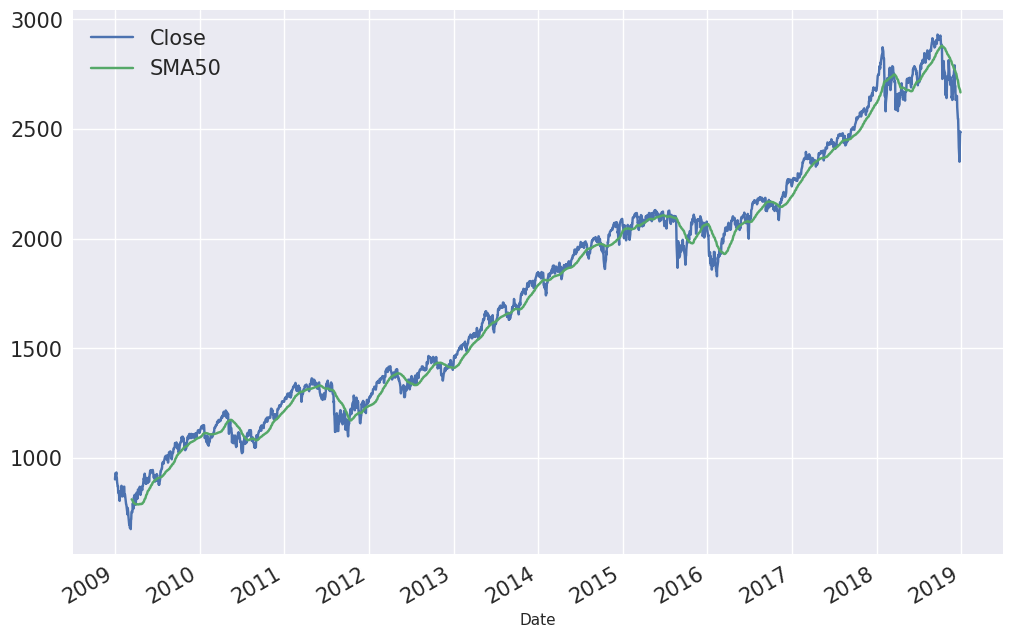

In [37]:
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [38]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

In [39]:
SP500.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585
2018-12-27,2488.830078,2673.646997,2748.52345
2018-12-28,2485.739990,2667.163398,2747.20475


In [40]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


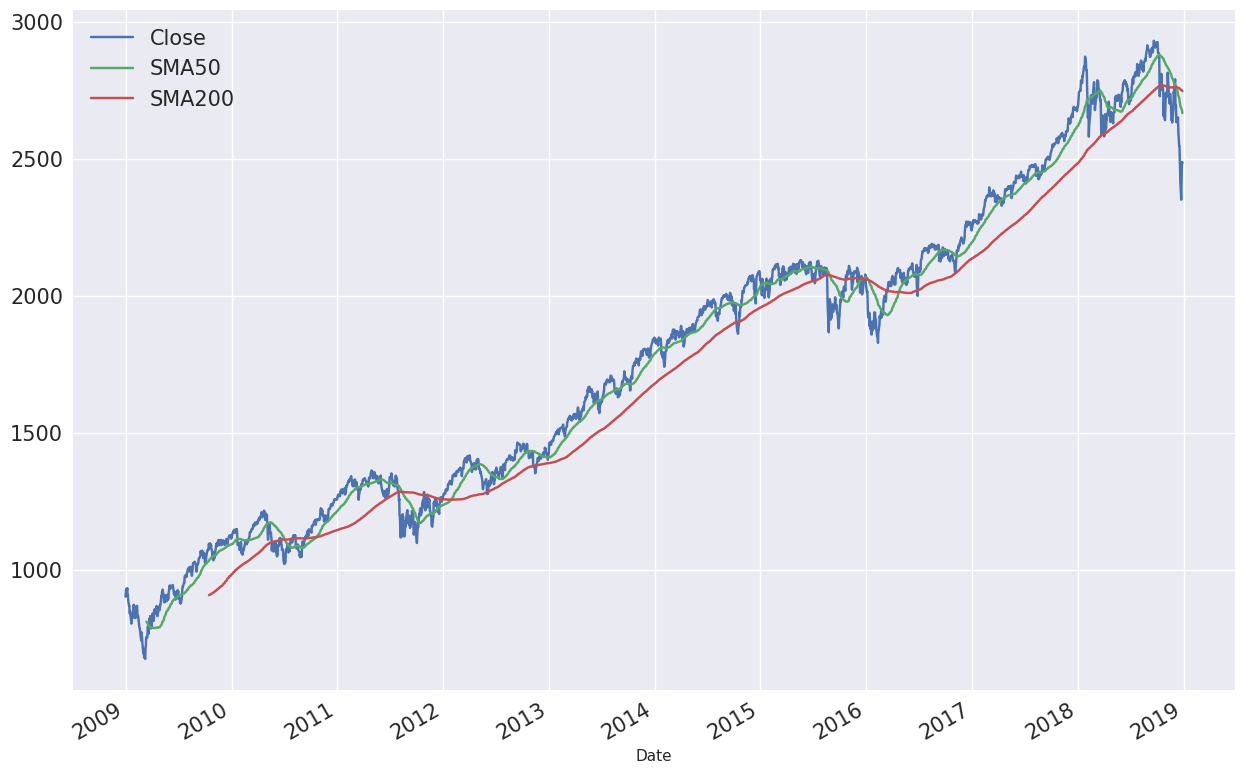

In [41]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

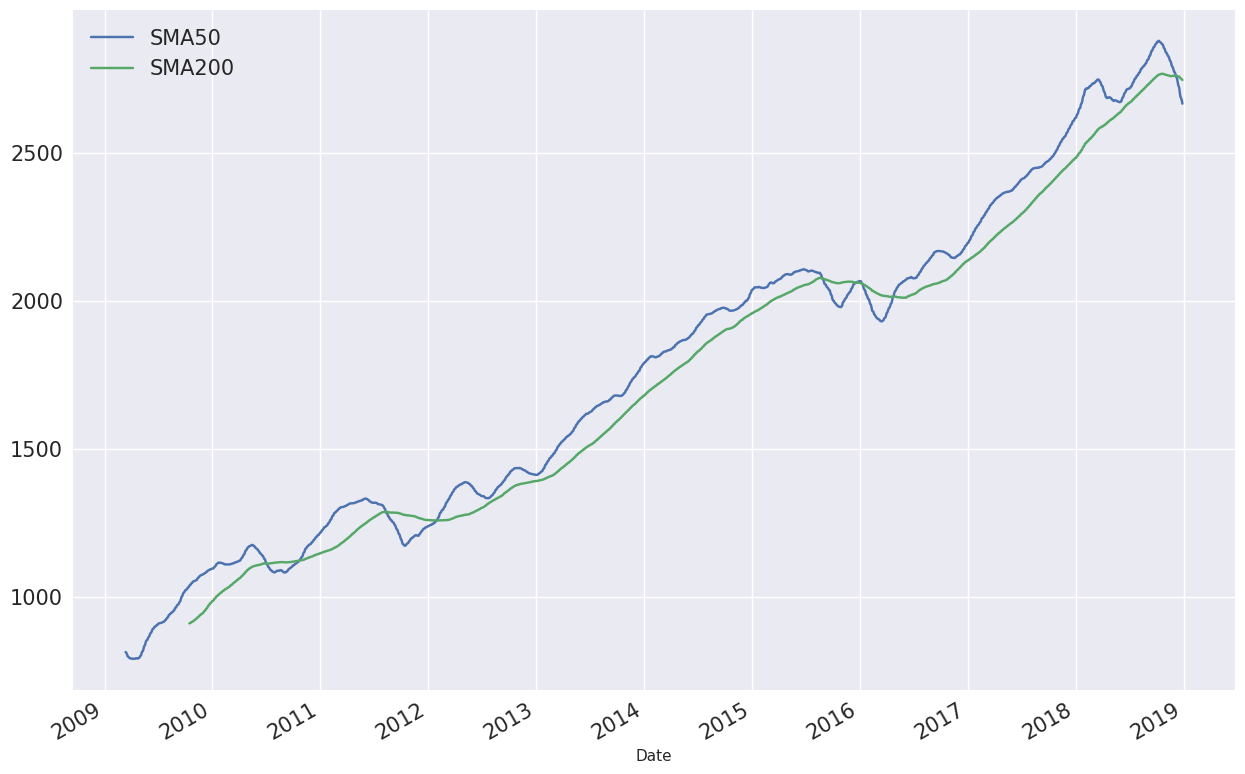

In [42]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

## Performance Reporting with rolling()

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [45]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col = "Date", 
                    usecols= ["Date", "Close"])

In [46]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [48]:
SP500.resample("ME", kind = "period").last()

/tmp/ipykernel_245409/3367896348.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  SP500.resample("ME", kind = "period").last()


,Close
Date,
1970-12,92.150002
1971-01,95.879997
1971-02,96.750000
1971-03,100.309998
1971-04,103.949997
...,...
2018-08,2901.520020
2018-09,2913.979980
2018-10,2711.739990


In [49]:
month_ret = SP500.resample("ME", kind = "period").last().pct_change().dropna()

/tmp/ipykernel_245409/1844070419.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  month_ret = SP500.resample("ME", kind = "period").last().pct_change().dropna()


In [50]:
month_ret

,Close
Date,
1971-01,0.040477
1971-02,0.009074
1971-03,0.036796
1971-04,0.036287
1971-05,-0.041558
...,...
2018-08,0.030263
2018-09,0.004294
2018-10,-0.069403


In [51]:
month_ret.rolling(36).mean()*12

,Close
Date,
1971-01,NaN
1971-02,NaN
1971-03,NaN
1971-04,NaN
1971-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [52]:
month_ret["Return"] = month_ret.rolling(36).mean()*12

In [53]:
month_ret.Close.rolling(36).std()*np.sqrt(12)

Date
1971-01         NaN
1971-02         NaN
1971-03         NaN
1971-04         NaN
1971-05         NaN
             ...   
2018-08    0.094305
2018-09    0.091740
2018-10    0.093480
2018-11    0.093556
2018-12    0.111514
Freq: M, Name: Close, Length: 576, dtype: float64

In [54]:
month_ret["Risk"] = month_ret.Close.rolling(36).std()*np.sqrt(12)

In [55]:
month_ret.dropna(inplace= True)

In [56]:
month_ret.head()

,Close,Return,Risk
Date,,,
1973-12,0.016569,0.026493,0.123219
1974-01,-0.010046,0.009652,0.121276
1974-02,-0.003624,0.005419,0.121201
1974-03,-0.023280,-0.014606,0.119981
1974-04,-0.039051,-0.039719,0.119791


In [57]:
month_ret.tail()

,Close,Return,Risk
Date,,,
2018-08,0.030263,0.133653,0.094305
2018-09,0.004294,0.143899,0.091740
2018-10,-0.069403,0.093103,0.093480
2018-11,0.017859,0.098888,0.093556
2018-12,-0.099425,0.071590,0.111514


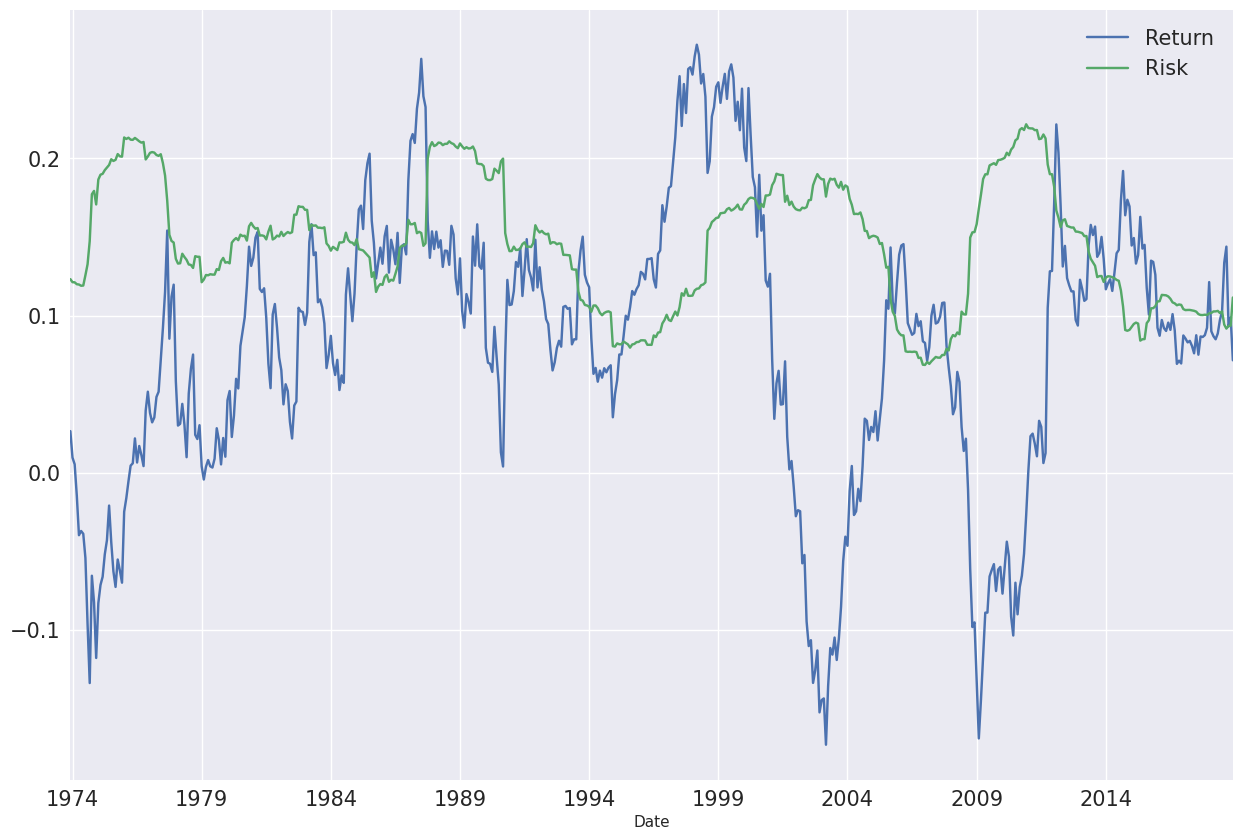

In [58]:
month_ret.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [59]:
month_ret.iloc[:,-2:].corr()

,Return,Risk
Return,1.000000,-0.327747
Risk,-0.327747,1.000000


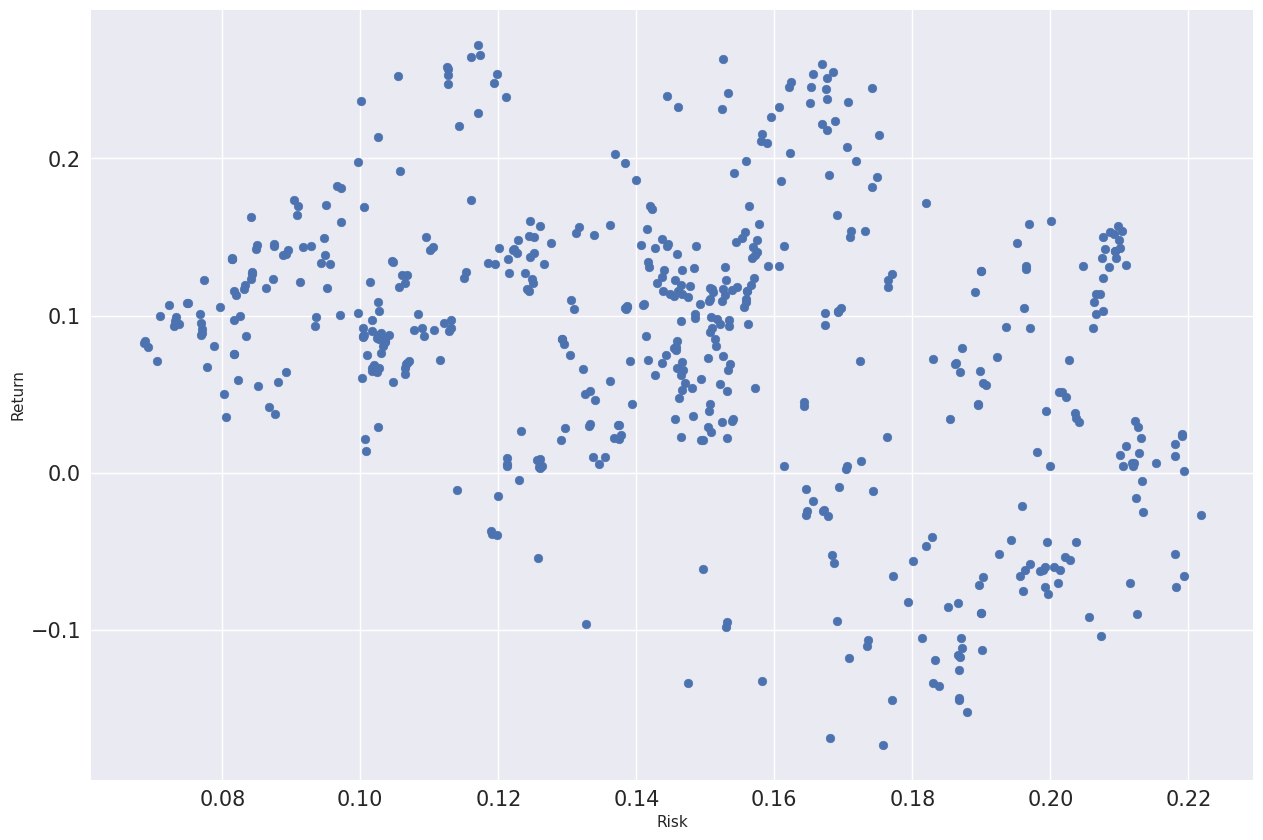

In [60]:
month_ret.iloc[:,-2:].plot(kind = "scatter", x = "Risk", y = "Return", figsize = (15,10), fontsize= 15, s = 40)
plt.show()

## Performance and Investment Periods / Time Diversification

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [63]:
SP500 = pd.read_csv("data/SP500.csv", parse_dates= ["Date"], index_col = "Date",
                    usecols = ["Date", "Close"])

In [64]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [65]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   12107 non-null  float64
dtypes: float64(1)
memory usage: 189.2 KB


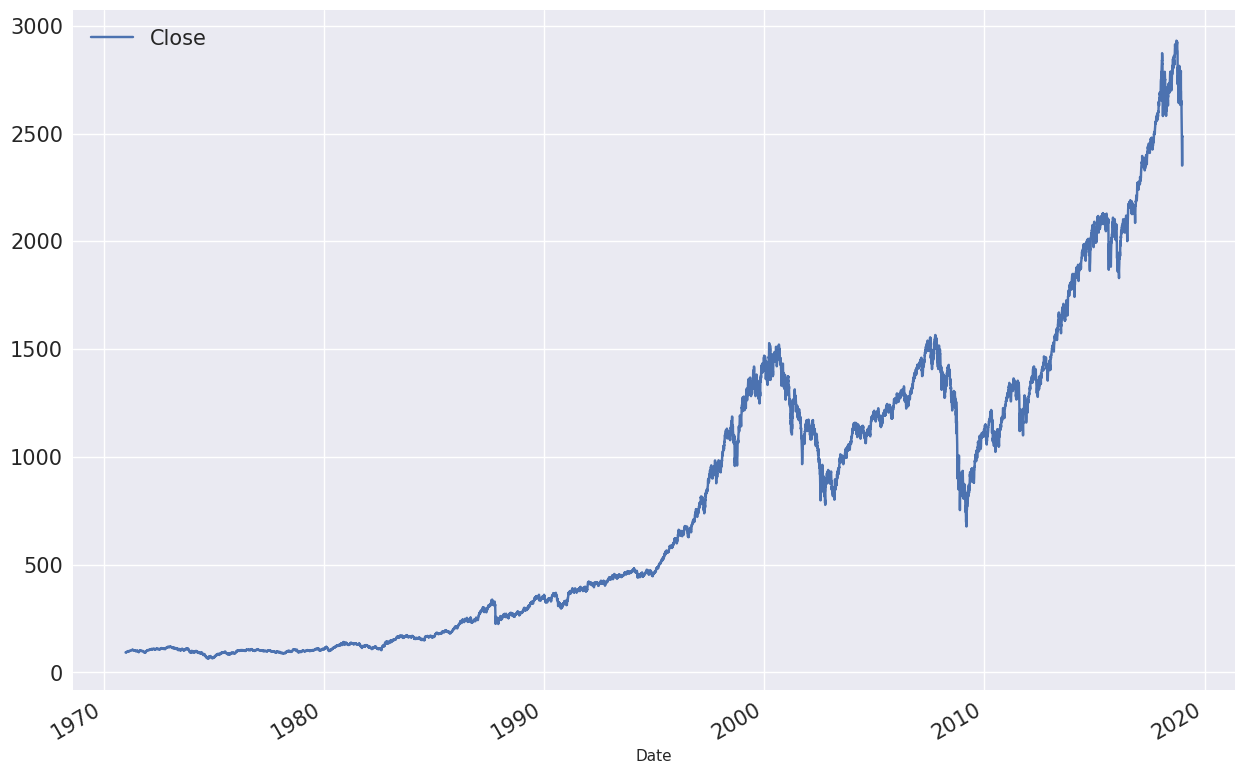

In [66]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

In [67]:
month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()

/tmp/ipykernel_245409/1980853421.py:1: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()
/tmp/ipykernel_245409/1980853421.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ret = SP500.resample("M", kind = "period").last().pct_change().dropna()


In [68]:
month_ret.tail()

,Close
Date,
2018-08,0.030263
2018-09,0.004294
2018-10,-0.069403
2018-11,0.017859
2018-12,-0.099425


In [69]:
month_ret.columns = ["m_returns"]

In [70]:
month_ret.rolling(3 * 12).mean()*12

,m_returns
Date,
1971-01,NaN
1971-02,NaN
1971-03,NaN
1971-04,NaN
1971-05,NaN
...,...
2018-08,0.133653
2018-09,0.143899
2018-10,0.093103


In [71]:
for years in [1, 3, 5, 10, 20]:
    month_ret["{}Y".format(years)] = month_ret.m_returns.rolling(years*12).mean()*12

In [72]:
month_ret.tail()

,m_returns,1Y,3Y,5Y,10Y,20Y
Date,,,,,,
2018-08,0.030263,0.165207,0.133653,0.119980,0.092904,0.066120
2018-09,0.004294,0.150198,0.143899,0.114889,0.102412,0.063215
2018-10,-0.069403,0.058606,0.093103,0.092089,0.112415,0.055730
2018-11,0.017859,0.048383,0.098888,0.090051,0.121685,0.053667
2018-12,-0.099425,-0.060874,0.071590,0.065453,0.110961,0.045877


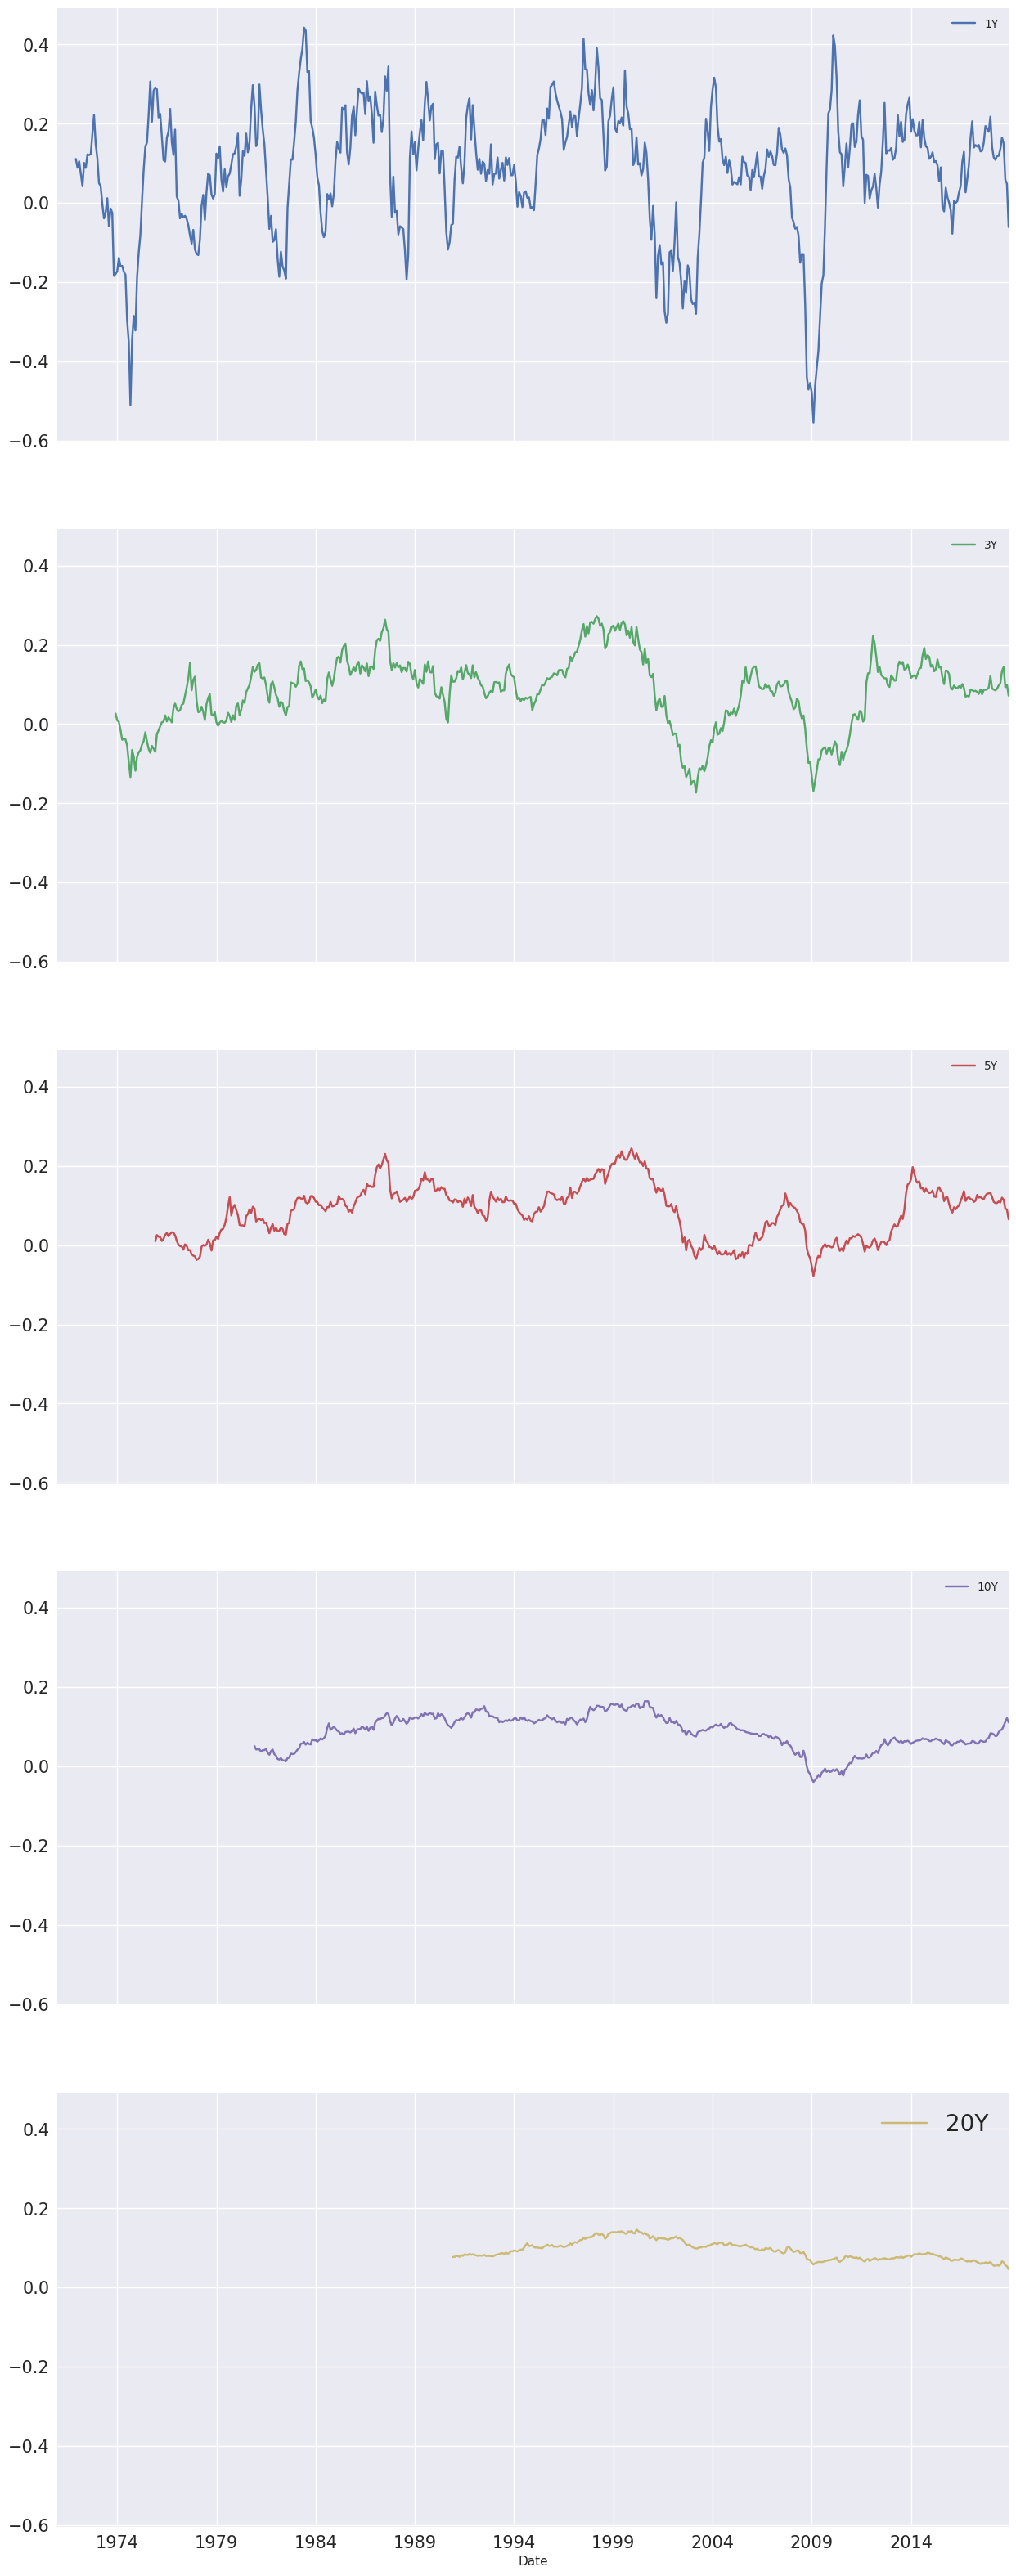

In [73]:
month_ret.iloc[:,-5:].plot(figsize = (15,40), subplots =True, fontsize= 15, sharey = True)
plt.legend(fontsize = 20)
plt.show()

## Simple Returns vs. Log Returns

In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [76]:
df

,Price
2016,100
2017,50
2018,95


In [77]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [78]:
simple_returns.mean()

Price    0.2
dtype: float64

In [79]:
100 * 1.2 * 1.2

144.0

In [80]:
df

,Price
2016,100
2017,50
2018,95


In [81]:
np.log(df / df.shift(1))

,Price
2016,NaN
2017,-0.693147
2018,0.641854


In [82]:
log_returns = np.log(df / df.shift(1)).dropna()

In [83]:
log_returns

,Price
2017,-0.693147
2018,0.641854


In [84]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [85]:
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

## The S&P 500 Return Triangle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
annual = SP500.resample("A", kind = "period").last()
annual

In [ ]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [ ]:

annual.dropna(inplace = True)

In [ ]:
annual

In [ ]:
years = annual.index.size
years

In [ ]:
windows = [year for year in range(30, 0, -1)]
windows

In [ ]:
for year in windows:
    annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [ ]:
annual

In [ ]:
triangle = annual.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".1%", cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.15, center = 0)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Dollar Triangle

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
annual = SP500.resample("A", kind = "period").last()
annual

In [ ]:
annual["Return"] = np.log(annual.Close / annual.Close.shift())

In [ ]:
annual.dropna(inplace = True)

In [ ]:
annual

In [ ]:
years = annual.index.size
years

In [ ]:
windows = [year for year in range(30, 0, -1)]
windows

In [ ]:
#for year in windows:
    #annual["{}Y".format(year)] = annual.Return.rolling(year).mean()

In [ ]:
for year in windows:
    annual["{}Y".format(year)] = np.exp(year * annual.Return.rolling(year).mean()) * 100

In [ ]:
annual

In [ ]:
triangle = annual.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot = True, fmt = ".0f",  cmap = "RdYlGn", 
            vmin =60, vmax = 140, center = 100)
plt.tick_params(axis = "y", labelright =True)
plt.show()

## The S&P 500 Return Radar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", 
                    usecols = ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["1988-12-30":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
weekly = SP500.resample("W", kind = "period").last()
weekly

In [ ]:
weekly["Return"] = np.log(weekly.Close / weekly.Close.shift())*52

In [ ]:
weekly.dropna(inplace = True)

In [ ]:
weekly

In [ ]:
weeks = weekly.index.size
weeks

In [ ]:
windows = [week for week in range(weeks, 0, -1)]
windows

In [ ]:
for week in windows:
    weekly["{}W".format(week)] = weekly.Return.rolling(week).mean()

In [ ]:
weekly

In [ ]:
triangle = weekly.drop(columns = ["Close", "Return"])

In [ ]:
triangle

In [ ]:
plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
sns.heatmap(triangle, annot =False, cmap = "RdYlGn", 
            vmin = -0.10, vmax = 0.10, center = 0)
#plt.tick_params(axis = "y", labelright =True)
plt.show()

## Exponentially-weighted Moving Averages (EWMA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [ ]:
SP500.head()

In [ ]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [ ]:
SP500.Close.rolling(window = 10).mean()

In [ ]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

In [ ]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [ ]:
SP500

In [ ]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)
plt.legend(fontsize = 15)
plt.show()

### Expanding Windows

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [ ]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [ ]:
SP500.head()

In [ ]:
SP500.Close.rolling(10).mean()

In [ ]:
SP500.Close.expanding(min_periods = 1).mean()

In [ ]:
SP500["SMA50"] = SP500.Close.rolling(50).mean()
SP500["EXP"] = SP500.Close.expanding().max()

In [ ]:
SP500.head()

In [ ]:
SP500.iloc[:, -2:].plot(figsize = (12, 8))
plt.show()

## Rolling Correlation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [ ]:
stocks.head()

In [ ]:
app_ba = stocks.loc["2009-12-31":"2018", ["AAPL", "BA"]]

In [ ]:
app_ba.head()

In [ ]:
month_ret = app_ba.resample("M", kind = "period").last().pct_change().dropna()

In [ ]:
month_ret.head()

In [ ]:
month_ret.tail()

In [ ]:
month_ret.info()

In [ ]:
month_ret.corr()

In [ ]:
month_ret.AAPL.rolling(36).corr(month_ret.BA)

In [ ]:
month_ret.AAPL.rolling(36).corr(month_ret.BA).plot(figsize = (12,8))
plt.show()

## rolling() with fixed-sized time offsets

In [ ]:
app_ba.head(7)

In [ ]:
app_ba.BA.rolling(window = 3).mean().head(7)

In [ ]:
app_ba.head(7)

In [ ]:
app_ba.BA.rolling(window = "3D", min_periods = 3).mean()

### Merging Time Series

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [ ]:
stocks.head()

In [ ]:
aapl = stocks.loc["2010-01-01" : "2014-12-31", "AAPL"].to_frame()
aapl.head()

In [ ]:
ba = stocks.loc["2012-01-01" : "2016-12-31", "BA"].to_frame()
ba.head()

In [ ]:
aapl["BA"] = ba.BA

In [ ]:
aapl.head()

In [ ]:
aapl.tail()

In [ ]:
aapl.dropna()

In [ ]:
ba.reindex(aapl.index).dropna()

In [ ]:
dis = stocks.loc["2010-01-01" : "2016-12-31", "DIS"].resample("W-Fri").last().to_frame()
dis.head()

In [ ]:
aapl.head()

In [ ]:
aapl["DIS"] = dis.DIS

In [ ]:
aapl.head(10)

In [ ]:
dis.reindex(aapl.index)

In [ ]:
dis["AAPL"] = aapl.AAPL

In [ ]:
dis.head(10)